In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sbn

# sbn.set()

In [31]:


visibilities_paths = [
    "/disk/xray0/tl3/repos/QuantifAI/dev/ungridded_vis/data/meerkat_simulation_1h_uv_only.npy",
    "/disk/xray0/tl3/repos/QuantifAI/dev/ungridded_vis/data/meerkat_simulation_2h_uv_only.npy",
    "/disk/xray0/tl3/repos/QuantifAI/dev/ungridded_vis/data/meerkat_simulation_4h_uv_only.npy",
    "/disk/xray0/tl3/repos/QuantifAI/dev/ungridded_vis/data/meerkat_simulation_8h_uv_only.npy",
]

vis_time_list = [
    "1h",
    "2h",
    "4h",
    "8h",
]

save_dir = "/disk/xray0/tl3/repos/QuantifAI/dev/ungridded_vis/imgs/"



In [32]:
# Load visibilities
uv_data = np.load(visibilities_paths[0], allow_pickle=True)[()]

In [33]:
uv_data['uu'].shape

(30240,)

In [34]:
import matplotlib.ticker as tck

In [35]:
def multiple_formatter(denominator=2, number=np.pi, latex='\pi'):
    def gcd(a, b):
        while b:
            a, b = b, a%b
        return a
    def _multiple_formatter(x, pos):
        den = denominator
        num = int(np.rint(den*x/number))
        com = gcd(num,den)
        (num,den) = (int(num/com),int(den/com))
        if den==1:
            if num==0:
                return r'$0$'
            if num==1:
                return r'$%s$'%latex
            elif num==-1:
                return r'$-%s$'%latex
            else:
                return r'$%s%s$'%(num,latex)
        else:
            if num==1:
                return r'$\frac{%s}{%s}$'%(latex,den)
            elif num==-1:
                return r'$\frac{-%s}{%s}$'%(latex,den)
            else:
                return r'$\frac{%s%s}{%s}$'%(num,latex,den)
    return _multiple_formatter

class Multiple:
    def __init__(self, denominator=2, number=np.pi, latex='\pi'):
        self.denominator = denominator
        self.number = number
        self.latex = latex

    def locator(self):
        return plt.MultipleLocator(self.number / self.denominator)

    def formatter(self):
        return plt.FuncFormatter(multiple_formatter(self.denominator, self.number, self.latex))


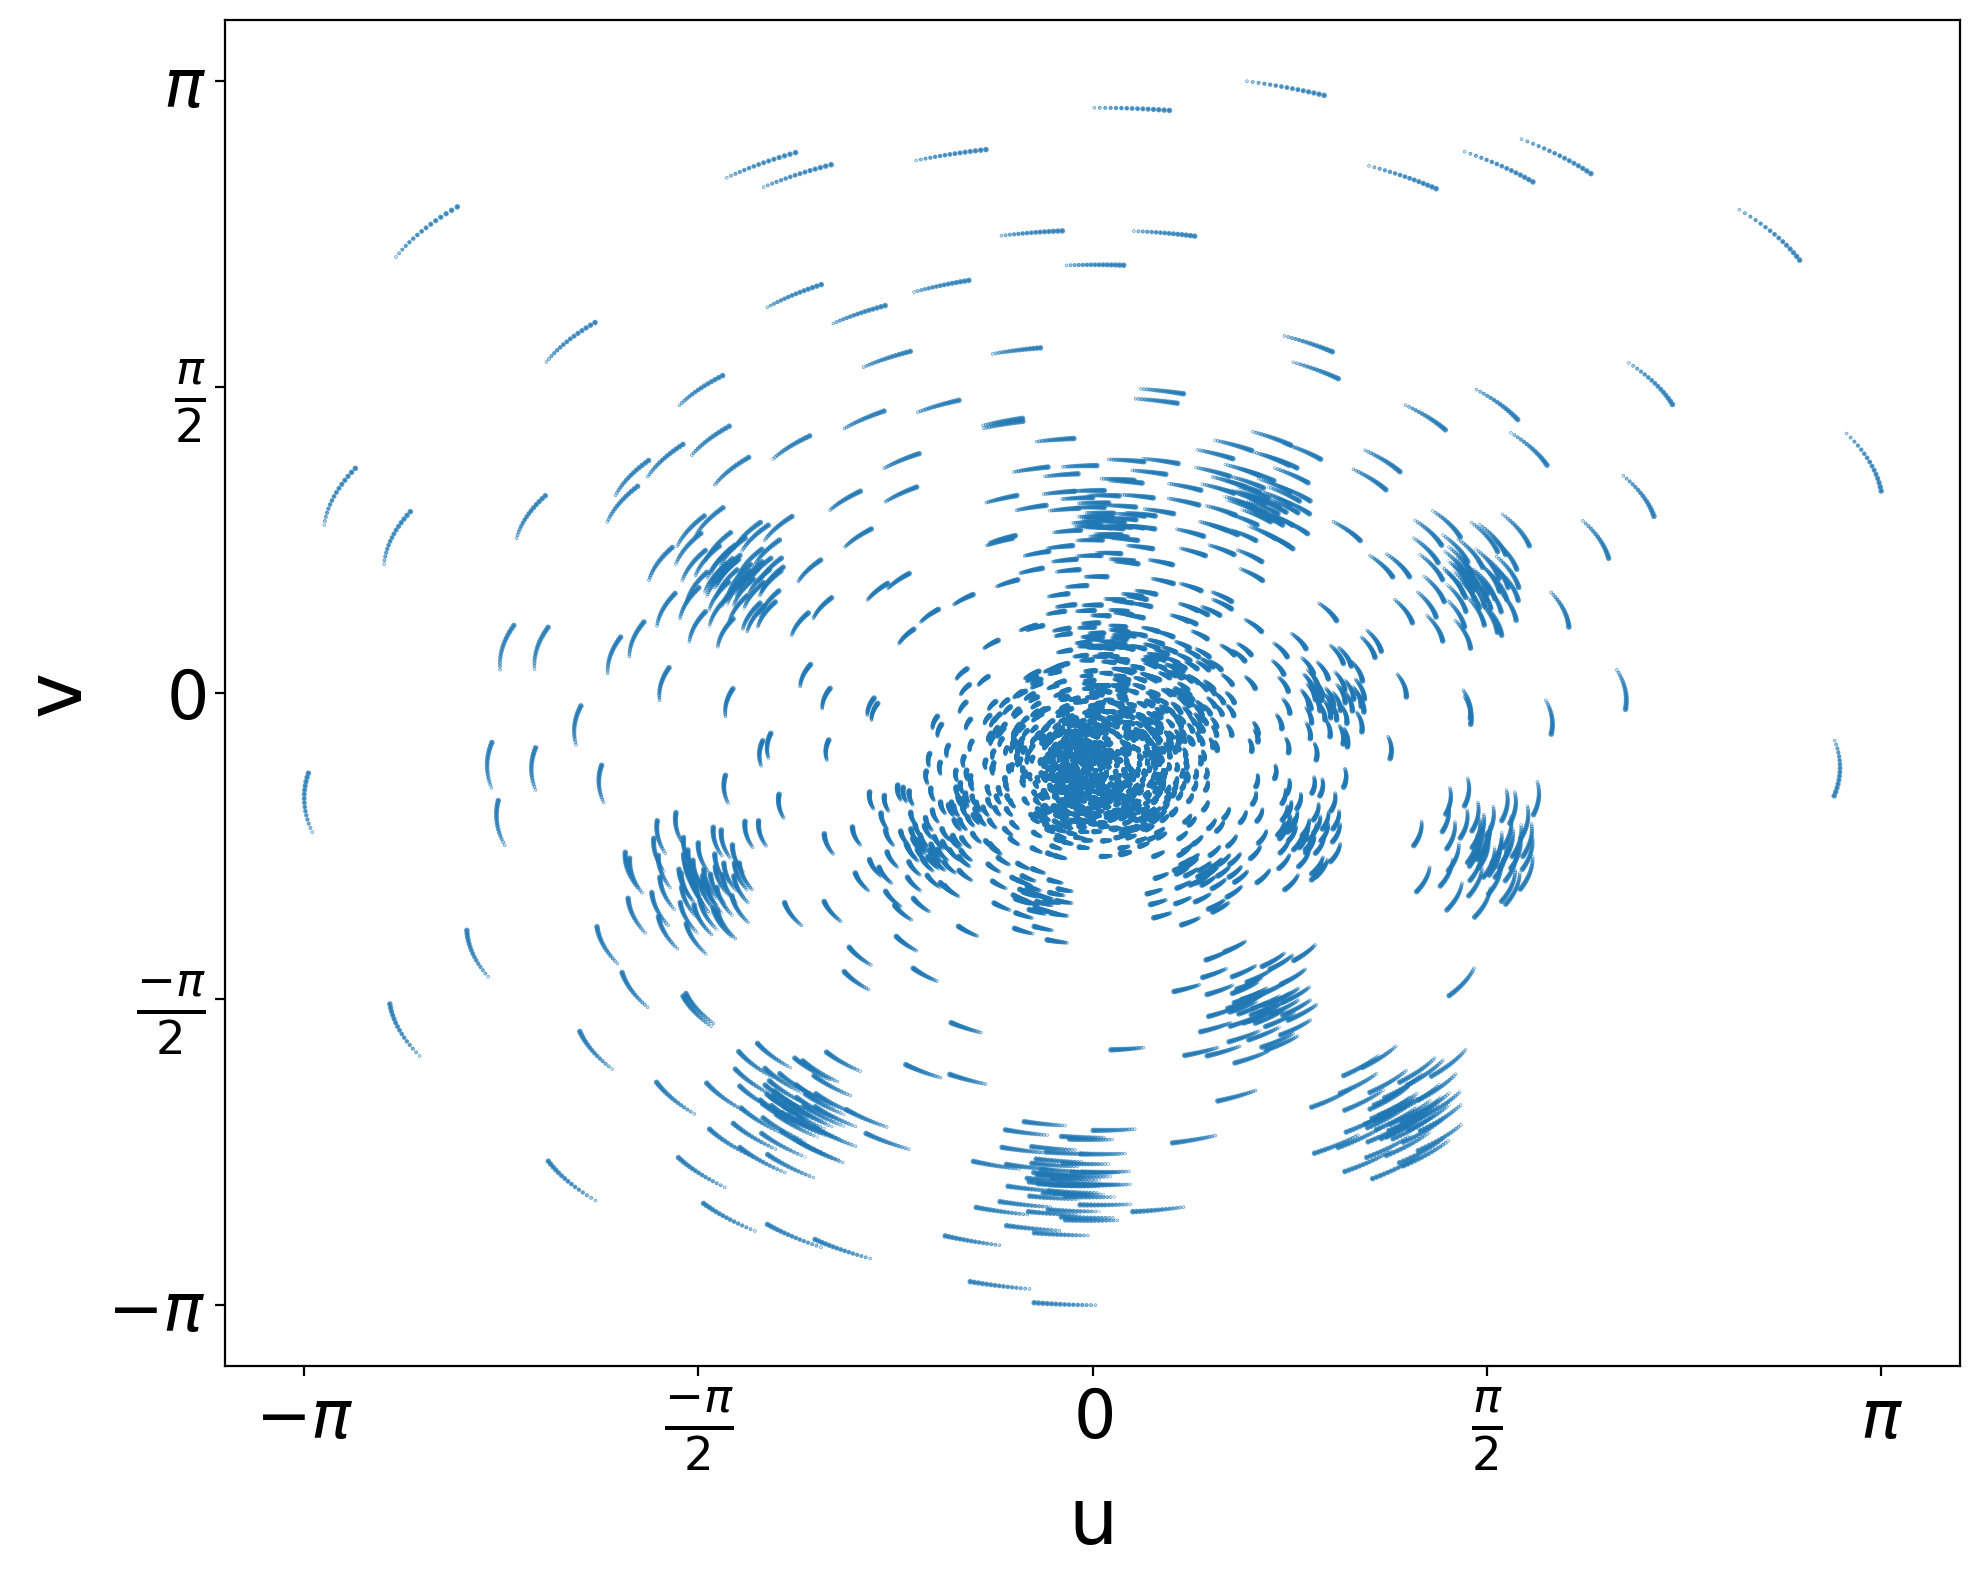

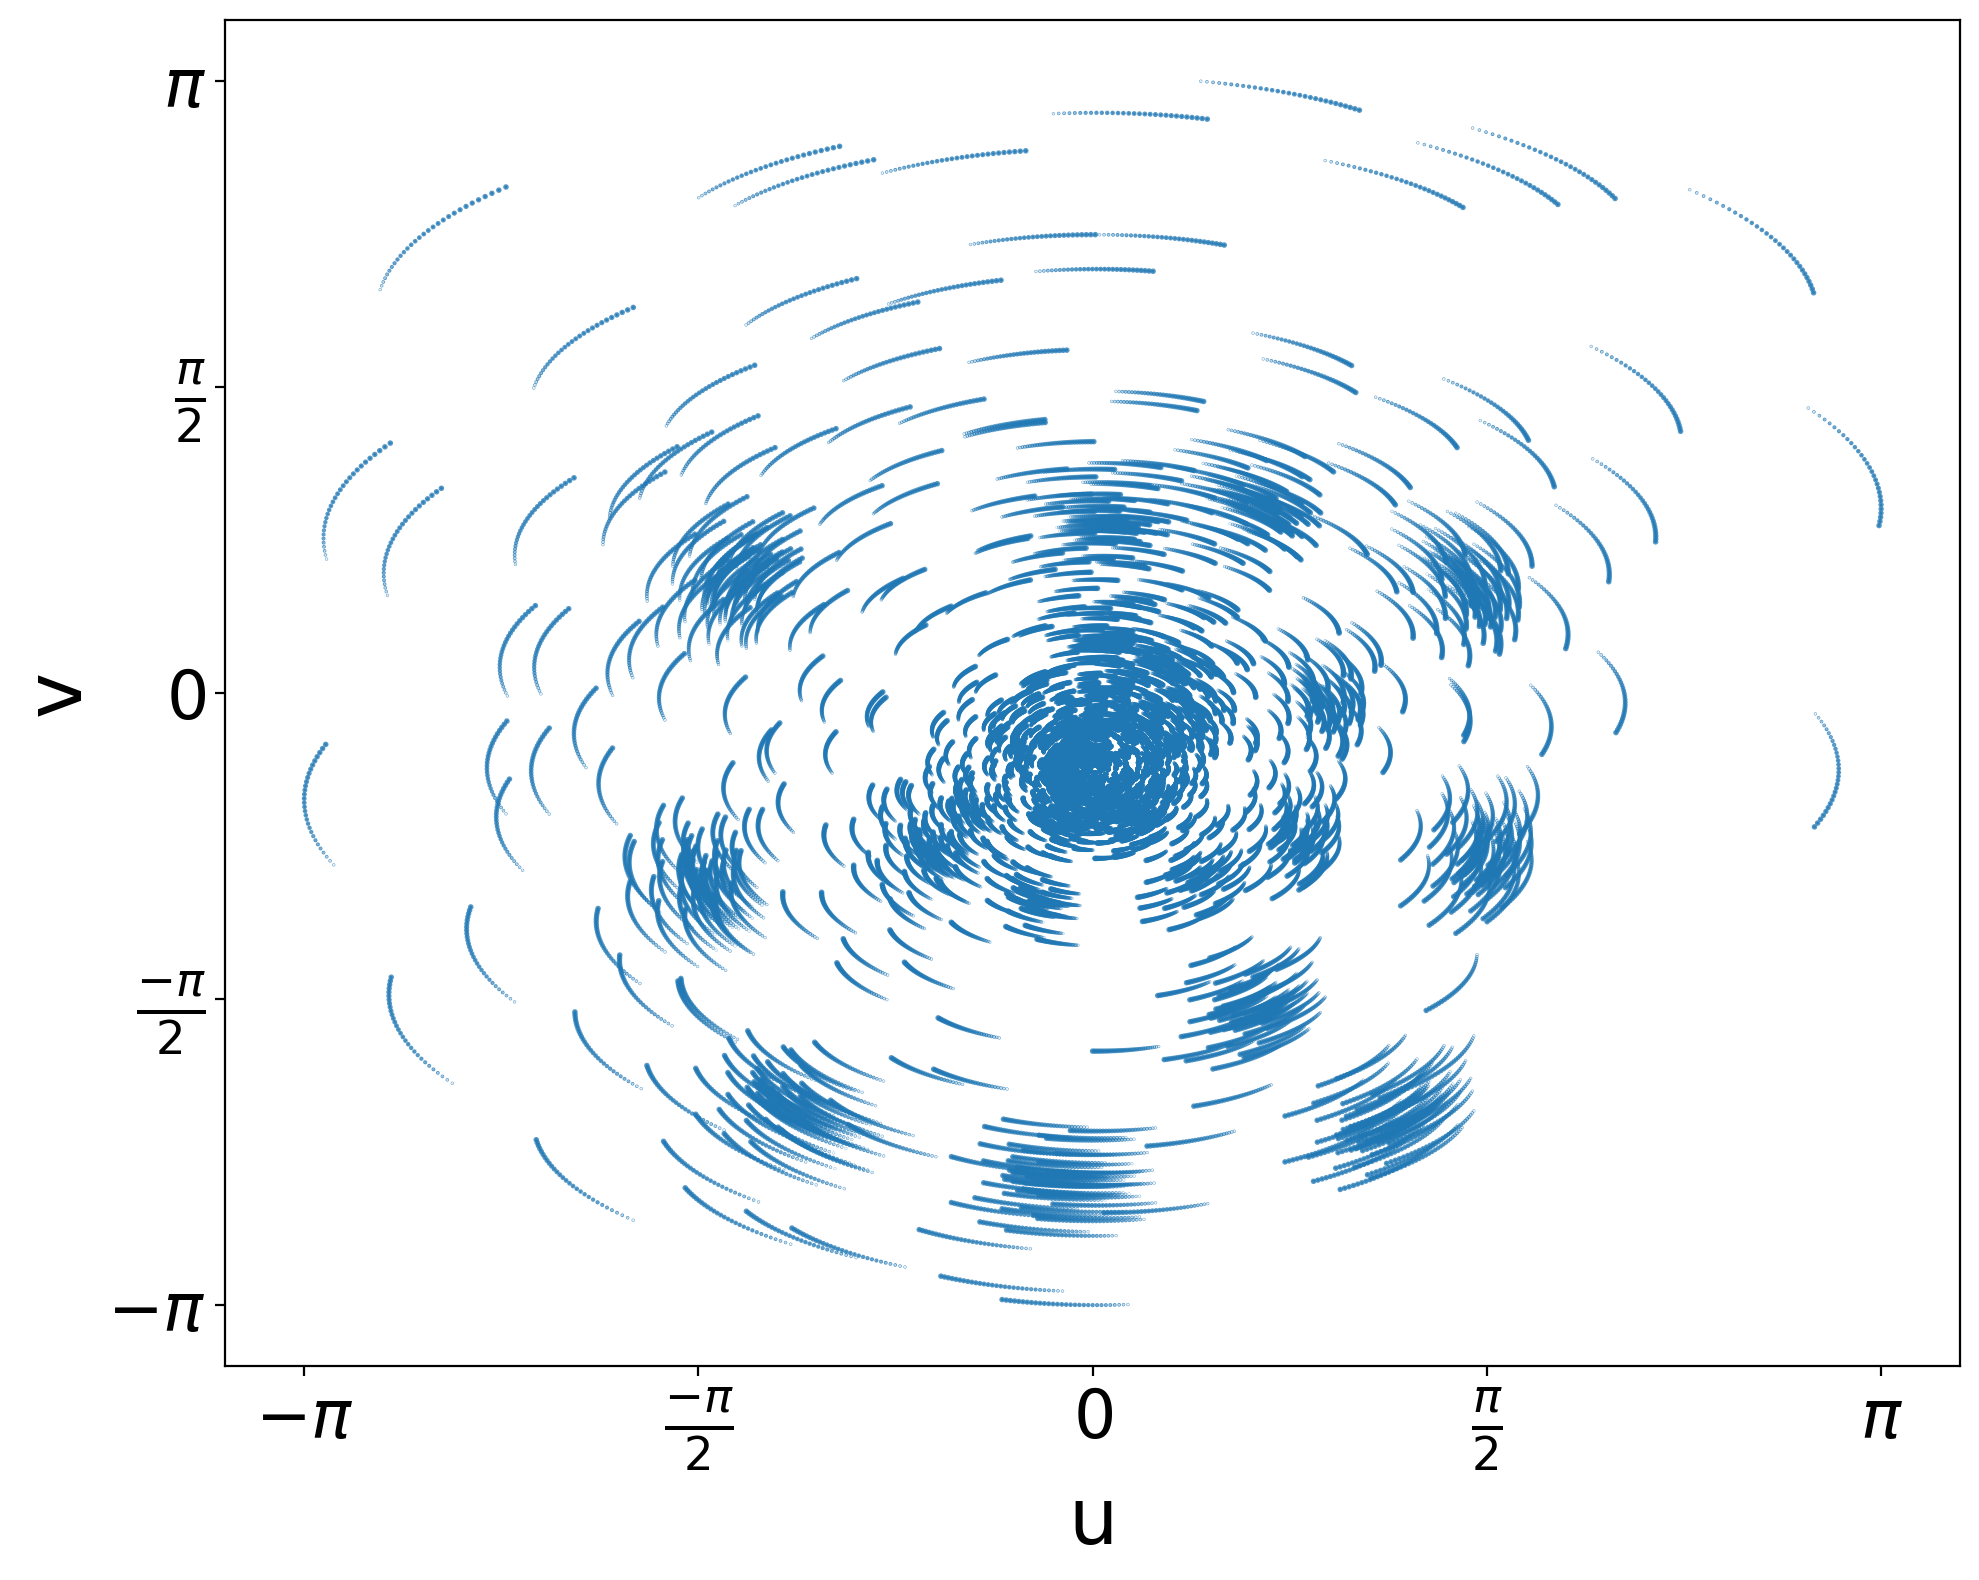

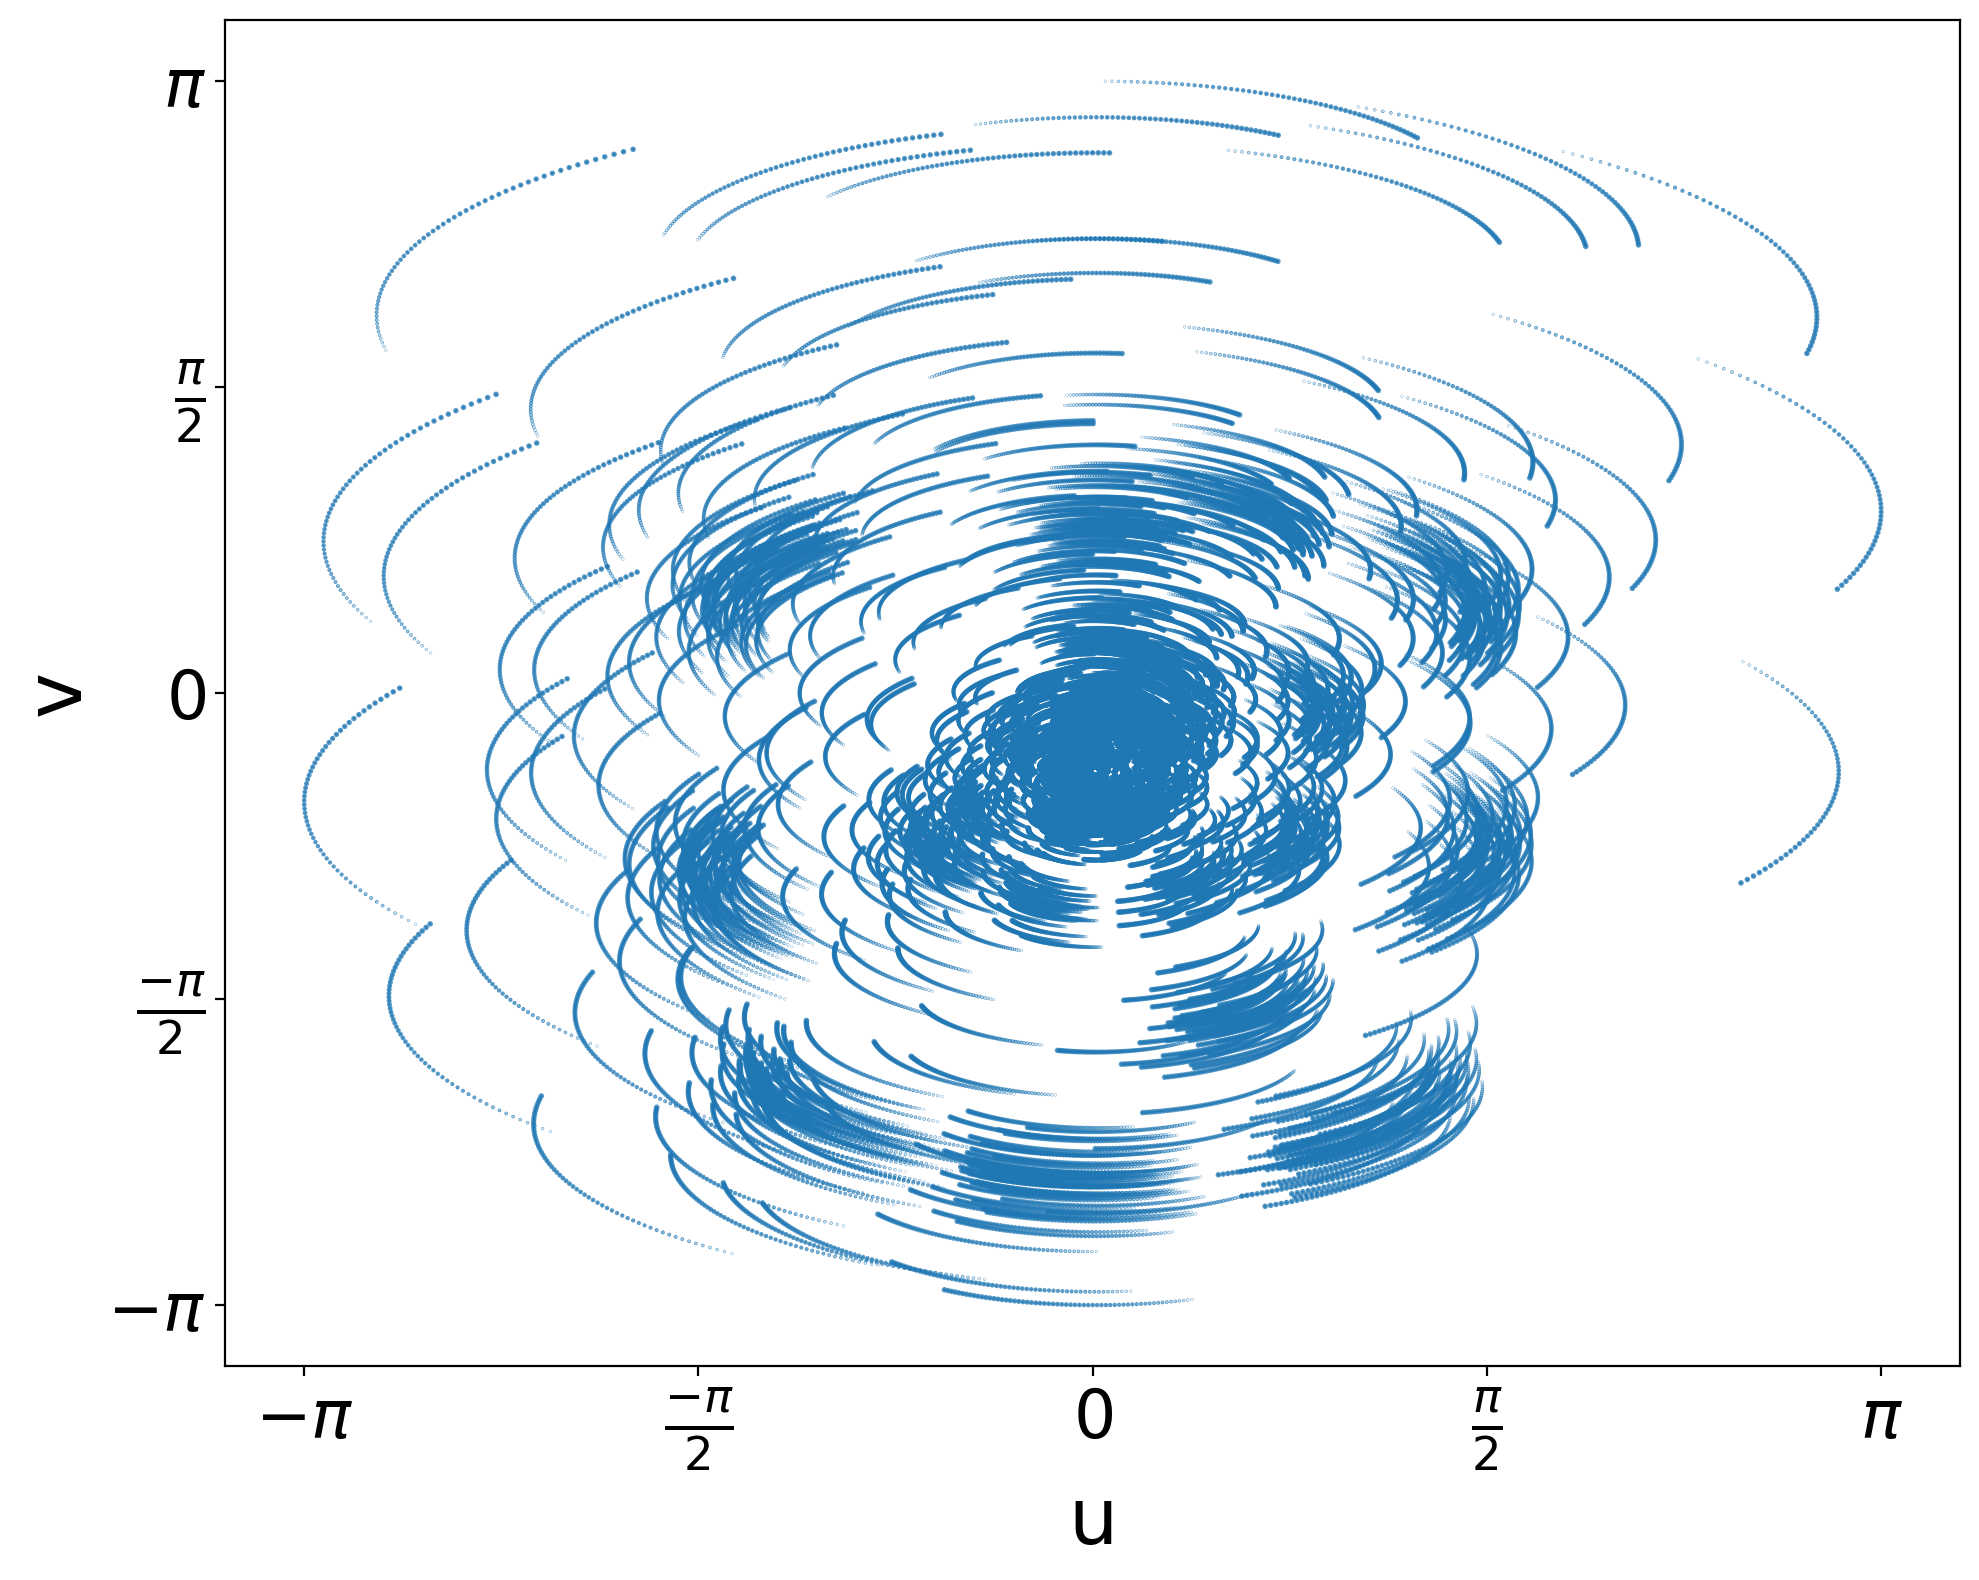

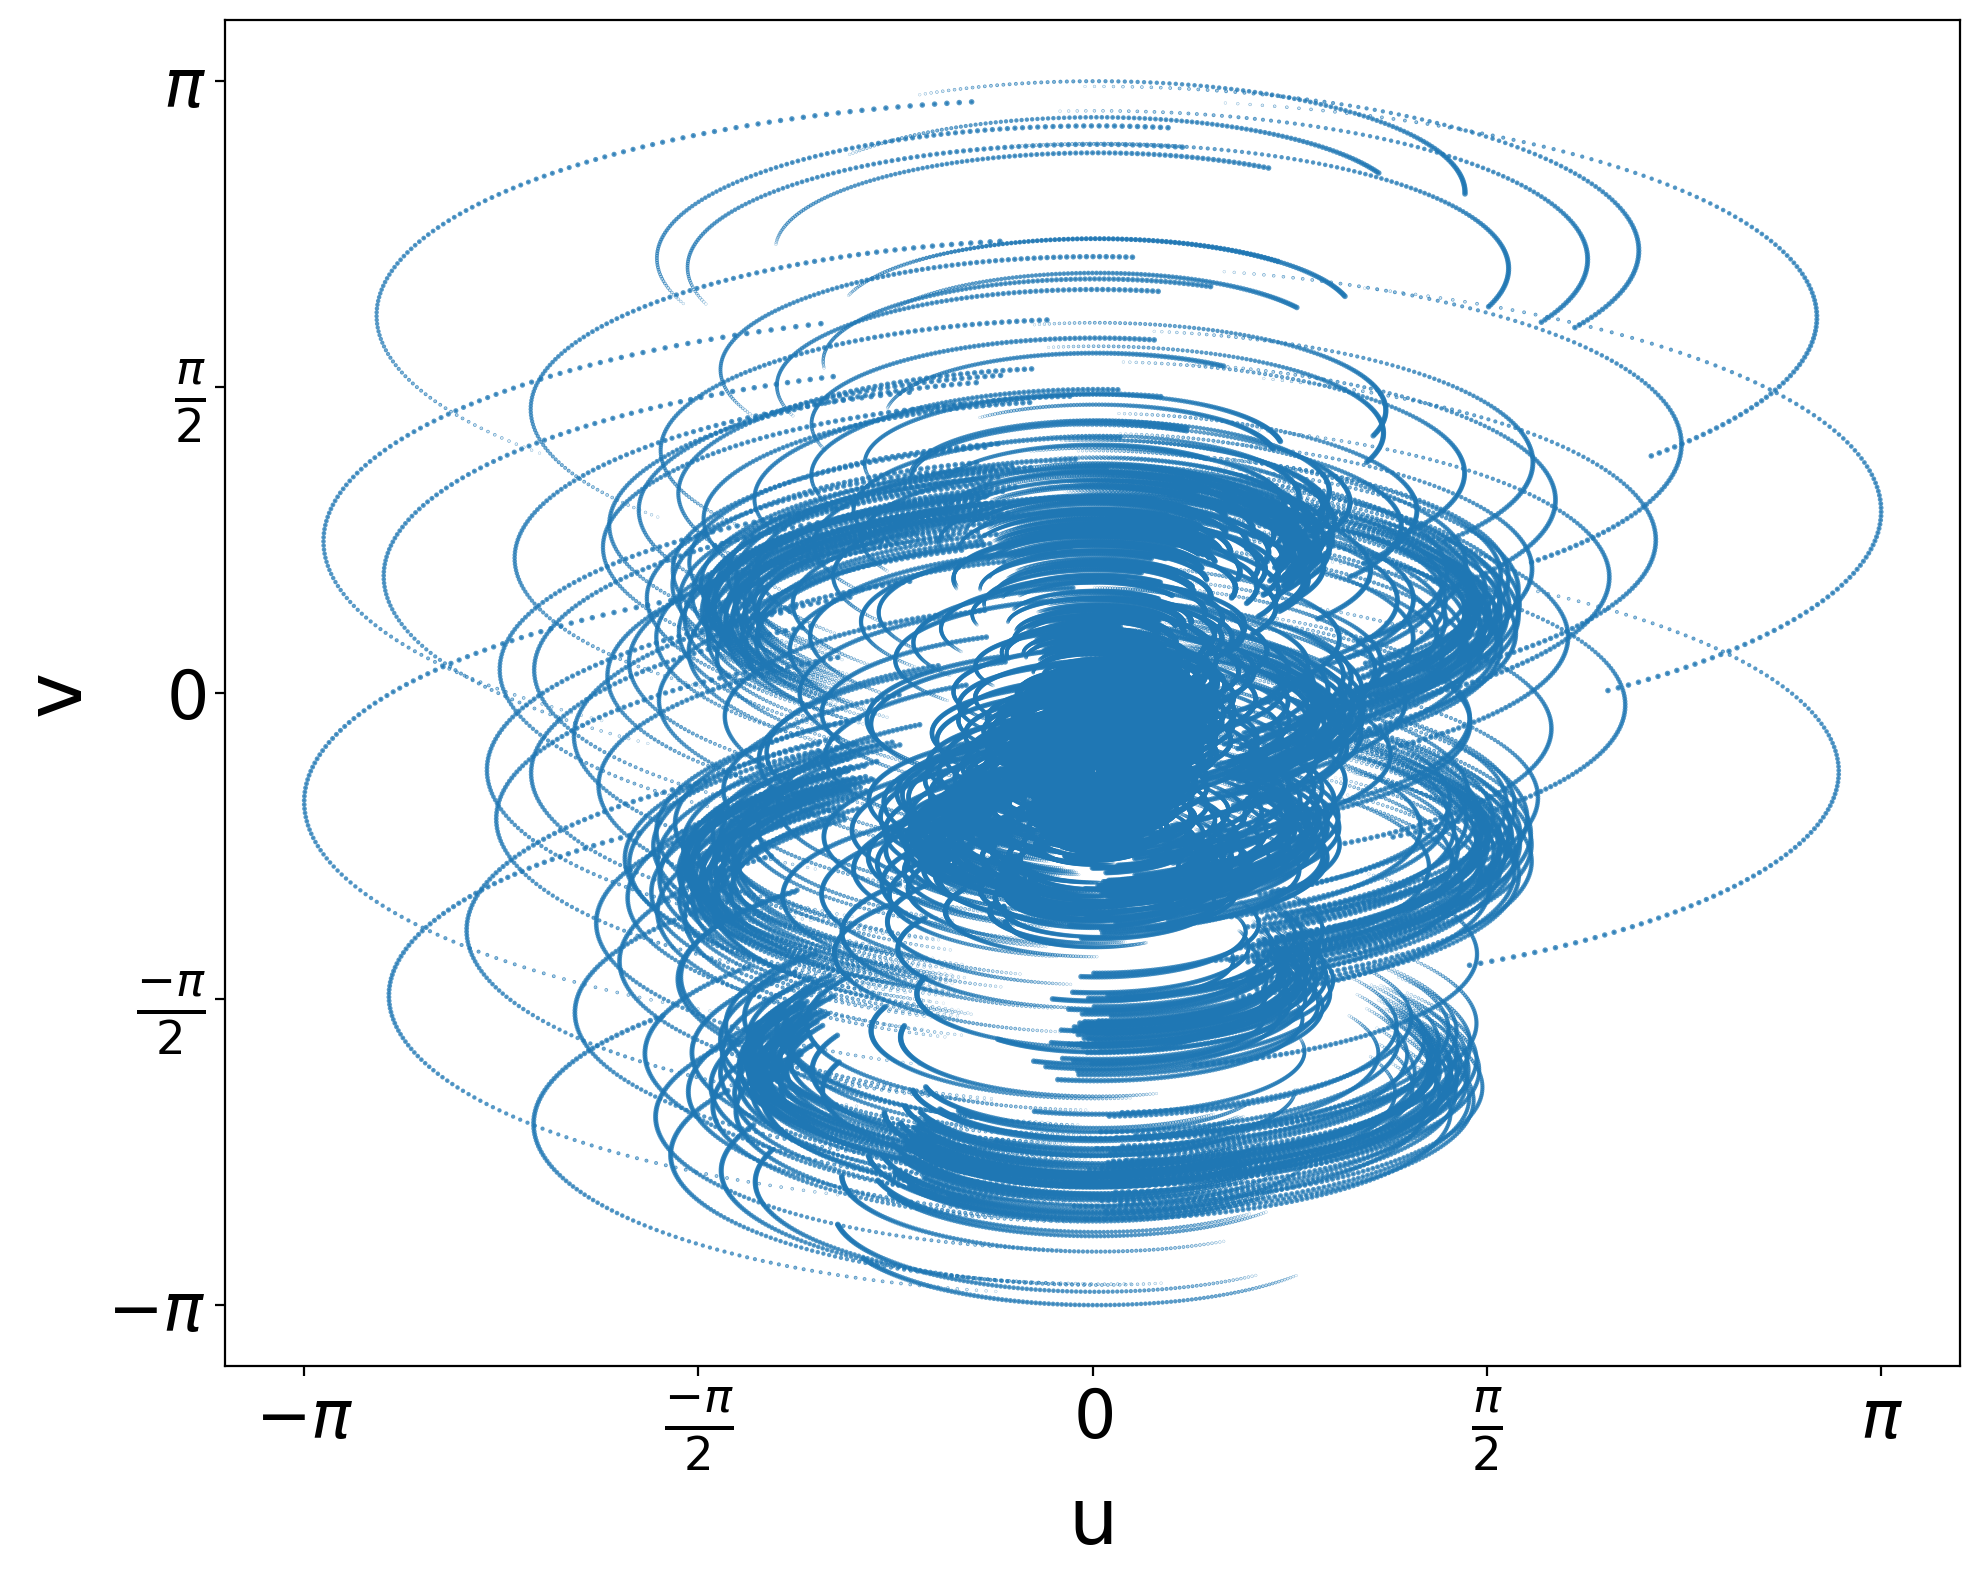

In [36]:


# Plot UV coverage
for it in range(len(visibilities_paths)):

    uv_data = np.load(visibilities_paths[it], allow_pickle=True)[()]

    vis_time = vis_time_list[it]
        
    uu_data = uv_data['uu']
    vv_data = uv_data['vv']

    
    plt.figure(figsize=(10,8), dpi=200)
    s = (np.arange(len(uu_data)) + 1) / (len(uu_data))
    ax = plt.gca()
    plt.scatter(uu_data, vv_data, s=s, alpha=0.75)
    ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
    ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
    ax.yaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))

    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)

    plt.xlabel(r"u", fontsize=28)
    plt.ylabel(r"v", fontsize=28)
    plt.tight_layout()
    plt.savefig(save_dir + "meerkat_" + vis_time + "_uv_coverage.jpg")
    # plt.close()

Text(0, 0.5, 'v')

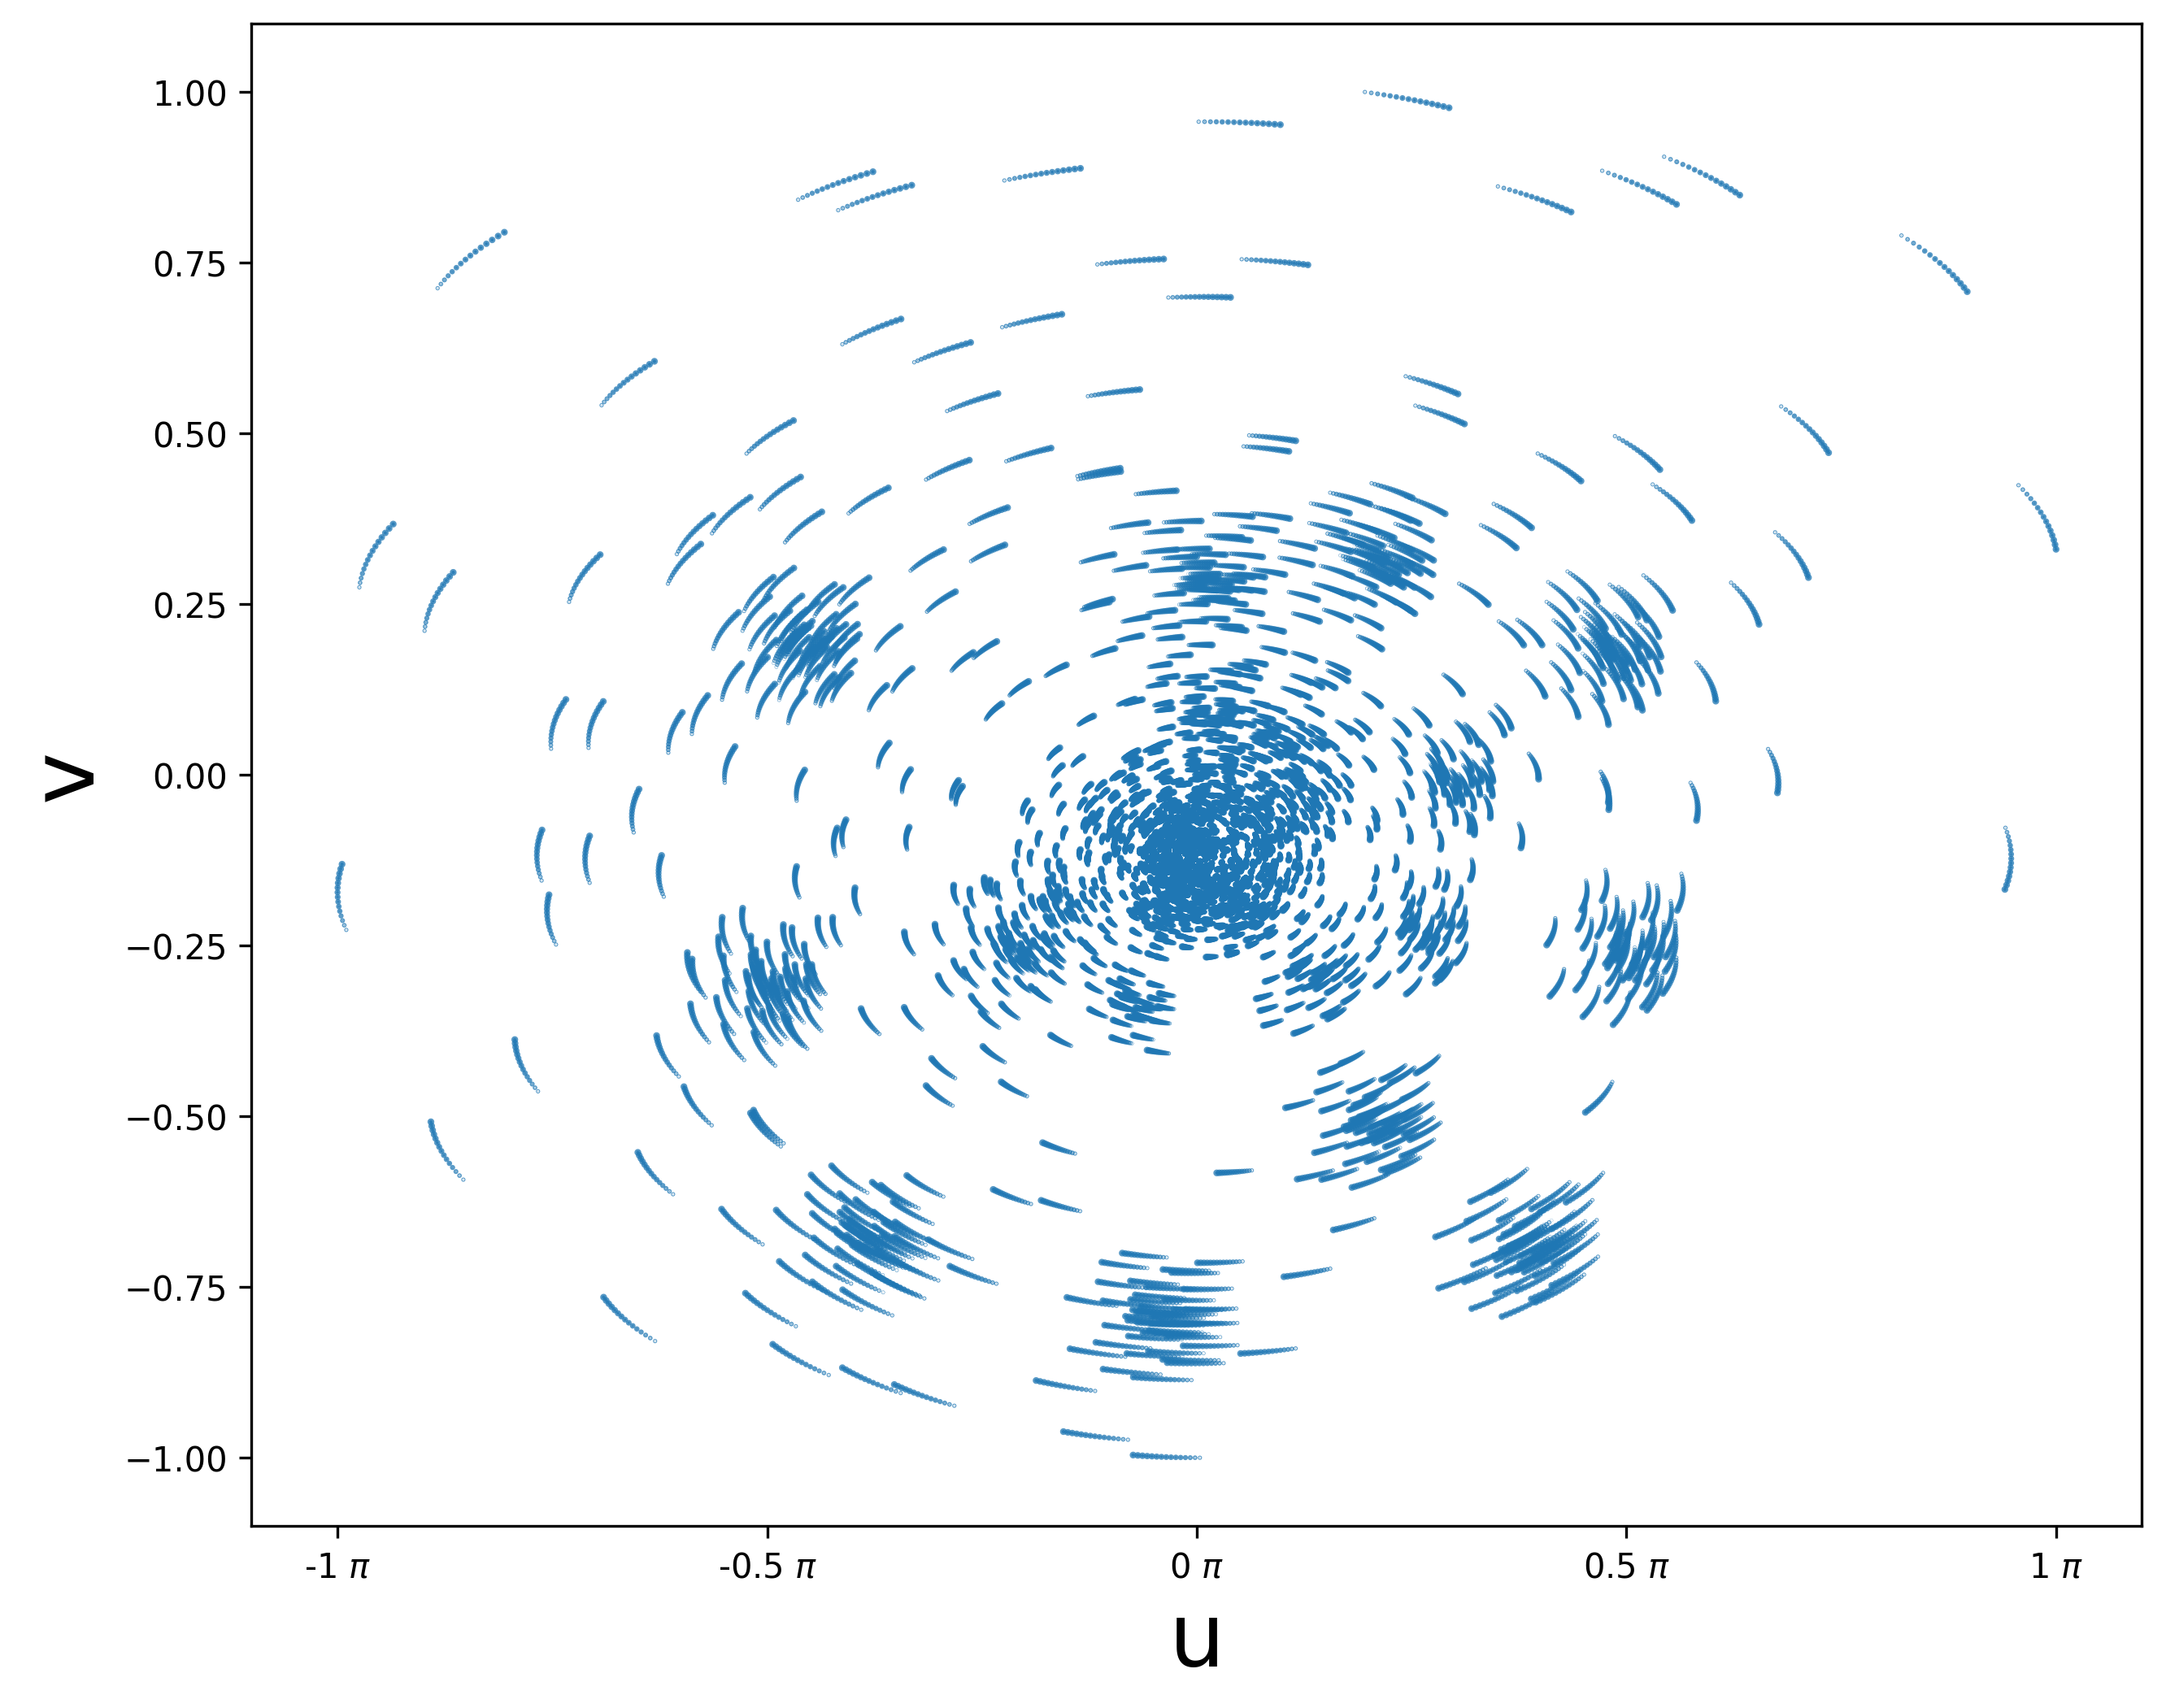

In [13]:

uu_data = uv_data['uu']
vv_data = uv_data['vv']

# Plot UV coverage
plt.figure(figsize=(10,8), dpi=300)
s = (np.arange(len(uu_data)) + 1) / (len(uu_data))
ax = plt.gca()
plt.scatter(uu_data/np.pi, vv_data/np.pi, s=s, alpha=0.75)
ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=0.5))
plt.xlabel(r"u", fontsize=26)
plt.ylabel(r"v", fontsize=26)
# plt.savefig(f"{msname}_uv_coverage.jpg")
# plt.close()
